In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time

data = pd.read_csv("D:/MCA SEM -2/ML/music recommendation system/data.csv")

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           2973 non-null   float64
 1   year              2973 non-null   int64  
 2   genres            2973 non-null   object 
 3   acousticness      2973 non-null   float64
 4   artists           2973 non-null   object 
 5   danceability      2973 non-null   float64
 6   duration_ms       2973 non-null   int64  
 7   energy            2973 non-null   float64
 8   explicit          2973 non-null   int64  
 9   id                2972 non-null   object 
 10  instrumentalness  2973 non-null   float64
 11  rank              2973 non-null   int64  
 12  liveness          2973 non-null   float64
 13  loudness          2973 non-null   float64
 14  count             2973 non-null   int64  
 15  mode              2973 non-null   int64  
 16  name              2973 non-null   object 


In [3]:
data.head(50)

,valence,year,genres,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,rank,liveness,loudness,count,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,21st century classical,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.2790,831667,0.21100,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,10,0.6650,-20.096,9,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,432hz,0.7320,['Dennis Day'],0.8190,180533,0.34100,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,7,0.1600,-12.441,26,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,8-bit,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.3280,500062,0.16600,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,3,0.1010,-14.850,7,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,[],0.9670,['Frank Parker'],0.2750,210000,0.30900,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,5,0.3810,-9.316,27,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,a cappella,0.9570,['Phil Regan'],0.4180,166693,0.19300,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,3,0.2290,-10.096,7,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,abstract,0.5790,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.6970,395076,0.34600,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,2,0.1300,-12.506,36,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,abstract beats,0.9960,['John McCormack'],0.5180,159507,0.20300,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,0,0.1150,-10.589,2,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,abstract hip hop,0.9930,['Sergei Rachmaninoff'],0.3890,218773,0.08800,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,1,0.3630,-21.091,2,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,accordeon,0.9960,['Ignacio Corsini'],0.4850,161520,0.13000,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,5,0.1040,-21.508,122,0,La Mañanita - Remasterizado,0,20-03-1921,0.0483,64.678
9,0.7710,1921,accordion,0.9820,['Fortugé'],0.6840,196560,0.25700,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,8,0.5040,-16.415,15,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [4]:
print("Number of song :- " , len(data))

Number of song :-  2973


In [5]:
def song_total(artist):
    find_art = data[(data['artists'] == artist)]
    return find_art


song_total("['Dennis Day']")

,valence,year,genres,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,rank,liveness,loudness,count,mode,name,popularity,release_date,speechiness,tempo
1,0.963,1921,432hz,0.732,['Dennis Day'],0.819,180533,0.341,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,7,0.1600,-12.441,26,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
44,0.205,1921,albany ny indie,0.965,['Dennis Day'],0.278,177067,0.251,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,5,0.1110,-11.139,2,1,Galway Bay,0,1921,0.0371,69.901
101,0.212,1921,arab folk,0.941,['Dennis Day'],0.241,196307,0.274,0,e006b1a48f466bf59feefed32bec6494495a4436,...,0,0.0984,-9.750,2,0,How Can You Buy Killarny,0,1921,0.0297,90.773
108,0.918,1921,argentine hardcore,0.834,['Dennis Day'],0.661,167027,0.489,0,e006b1a48f466bf59feefed32bec6494495a4436,...,10,0.1860,-11.043,2,1,St. Patrick's Day Parade,1,1921,0.1030,125.023


Part Hirani B22

In [6]:
# sum of listen count of the songs

song_group = data.groupby(['name']).agg({'count':'count'}).reset_index()
song_group.head(50)

,name,count
0,"""Jubel"" - Overture, Op. 59",1
1,'Cause I Feel Lowdown,1
2,'Sippi,1
3,'Tain't Nobody's Biz-Ness If I Do,1
4,'Tain't Nobody's Bizness If I Do,1
5,'Tain't What You Do (It's The Way That You Do It),1
6,'Twas the Night Before Christmas,1
7,(I Don't Stand) A Ghost Of A Chance,1
8,(I'll Be Glad When You're Dead) You Rascal You,1
9,(The) Baltimore (feat. Bix Beiderbecke & Eddie...,1


In [7]:
group_of_sum = song_group['count'].sum()
song_group['percentage'] = (song_group['count'] / group_of_sum) * 100
song_group.sort_values(['count', 'name'], ascending = False)

,name,count,percentage
520,Dinah,7,0.235452
1968,St. Louis Blues,6,0.201816
1965,Squeeze Me,6,0.201816
1719,Potato Head Blues,6,0.201816
2193,Tight Like This,5,0.168180
...,...,...,...
4,'Tain't Nobody's Bizness If I Do,1,0.033636
3,'Tain't Nobody's Biz-Ness If I Do,1,0.033636
2,'Sippi,1,0.033636
1,'Cause I Feel Lowdown,1,0.033636


In [8]:
data['liveness'].head(2)

0    0.665
1    0.160
Name: liveness, dtype: float64

<AxesSubplot:xlabel='liveness'>

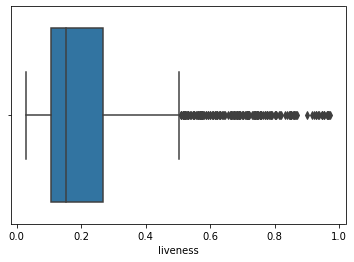

In [9]:
import seaborn as sns
sns.boxplot(x=data['liveness'])

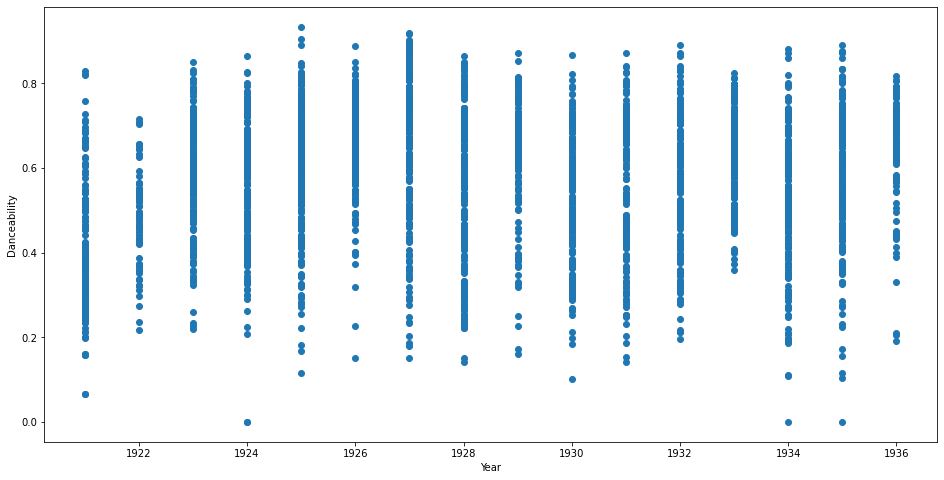

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['year'], data['danceability'])
ax.set_xlabel('Year')
ax.set_ylabel('Danceability')
plt.show()

In [11]:
u = data['id'].unique()
u

len(u)

91

In [12]:
train_data, test_data = train_test_split(data, test_size = 0.20, random_state=42)

In [13]:
train_data

,valence,year,genres,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,rank,liveness,loudness,count,mode,name,popularity,release_date,speechiness,tempo
2394,0.101,1933,russian punk,0.969,"['Billie Holiday', 'Benny Carter & His All Sta...",0.632,172800,0.180,0,01655ae6bc52e29c9cd100a7dde4e9eeae5e4031,...,9,0.3860,-12.078,3,0,St. Louis Blues (with Benny Carter & His All S...,10,1933,0.0391,111.798
1910,0.101,1931,neo-singer-songwriter,0.995,['Ignacio Corsini'],0.576,172960,0.167,0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,...,2,0.2730,-21.534,1,0,La Marcha Nupcial - Remasterizado,0,25-06-1931,0.2540,139.463
509,0.101,1924,chicago rap,0.658,"['The Chenille Sisters', ""James Dapogny's Chic...",0.650,196560,0.599,0,5a905f000fc1ff3df7ca807d57edb608863db05d,...,8,0.2390,-10.187,2,1,Nagasaki,1,1924,0.0536,116.474
2051,0.101,1932,oi,0.978,['Helen Crawford'],0.353,186800,0.115,0,732f88be38fae217f8ab7e24c20dd072436e3e40,...,11,0.3710,-19.434,4,0,Can't We Talk It Over?,7,1932,0.0507,88.882
1839,0.101,1931,movie tunes,0.991,['Umm Kulthum'],0.415,472573,0.134,0,77cac5c3389010b64d01b30f725c24de4a5bb626,...,7,0.3480,-18.607,8,1,Rohy We Rohak,0,01-01-1931,0.0463,108.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.101,1930,latin jazz,0.958,"['Franz Liszt', 'Vladimir Horowitz']",0.342,618987,0.176,0,43683da3c6c5a93c7938ff550faf0d039a9a639a,...,5,0.0963,-18.769,48,1,"Sonata for Piano in B Minor, S. 178: I. Lento ...",12,1930,0.0286,79.566
1095,0.101,1927,french movie tunes,0.929,"['Pietro Mascagni', 'Staatskapelle Berlin']",0.204,237883,0.142,0,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,...,5,0.3050,-17.173,2,1,Cavalleria rusticana: Intermezzo sinfonico,2,01-01-1927,0.0481,82.853
1130,0.101,1927,g funk,0.993,['Francisco Canaro'],0.820,160507,0.220,0,2c42e6551311710ca5a839d62058820a42ead493,...,4,0.1100,-13.389,2,1,"Hi Diddle, Diddle - Instrumental (Remasterizado)",0,20-08-1927,0.0544,114.859
1294,0.101,1928,hip house,0.956,"['Anita Darian', 'Louise Parker', 'The Merrill...",0.415,232467,0.296,0,a58de017cbeda1763ea002fe027ed41b4ed53109,...,3,0.0795,-10.431,1,1,Can't Help Lovin' Dat Man,6,1928,0.0334,120.340


In [14]:
test_data

,valence,year,genres,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,rank,liveness,loudness,count,mode,name,popularity,release_date,speechiness,tempo
2401,0.101,1933,ryukyu ongaku,0.8820,"['Billie Holiday', 'Teddy Wilson']",0.650,167560,0.242,0,01655ae6bc52e29c9cd100a7dde4e9eeae5e4031,...,0,0.2500,-12.218,1,1,My First Impression of You (with Teddy Wilson ...,12,1933,0.0512,103.179
2863,0.101,1936,vgm remix,0.9520,['Billie Holiday'],0.719,183440,0.209,0,3ff7a31452eeabd7a4e07f0d243c674e3d0adf46,...,9,0.0651,-11.080,2,0,If My Heart Could Only Talk,19,1936,0.0491,110.530
2157,0.101,1932,polish contemporary classical,0.9420,['Galatasaray İz Cazı Ork.'],0.388,192687,0.461,0,732f88be38fae217f8ab7e24c20dd072436e3e40,...,7,0.8040,-9.653,2,1,Yalan Tango,0,16-04-1932,0.0451,107.588
507,0.101,1924,chicago pop punk,0.9900,['George Olsen'],0.689,185853,0.319,0,5a905f000fc1ff3df7ca807d57edb608863db05d,...,0,0.0421,-12.398,1,1,You'll Never Get to Heaven with Those Eyes,0,01-01-1924,0.0612,97.806
1817,0.101,1931,modern psychedelic folk,0.5620,['Charlie Chaplin'],0.203,570203,0.418,0,99b5f915dd56a0150eb91605e1f6109e1e80c9de,...,11,0.1030,-6.824,2,1,Money for the Girl / The Flower Shop,6,1931,0.0392,89.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0.101,1925,danish singer-songwriter,0.9940,['Emma Liebel'],0.670,147227,0.222,0,baf47ed8da24d607e50d8684cde78b923538640f,...,10,0.0725,-14.268,2,1,Mon Paris,0,1925,0.0682,133.096
1472,0.101,1929,j-division,0.0441,['Эрих Мария Ремарк'],0.727,115955,0.317,1,ee03697dfdf668a9cd19a44a6f257b9d6a1dc60a,...,10,0.2250,-17.794,1,0,Часть 18.3 & Часть 19.1 - На Западном фронте б...,0,1929,0.8560,120.474
2614,0.101,1935,swamp rock,0.9380,['Glenn Miller'],0.617,180827,0.154,0,7e2b716907a9a295d92c2f35d7e260aeee2b32cf,...,5,0.1720,-23.122,2,0,Doin' The Jive,35,1935,0.3410,184.826
678,0.101,1925,contemporary choir,0.9580,['Ethel Waters'],0.628,192107,0.227,0,5a905f000fc1ff3df7ca807d57edb608863db05d,...,5,0.1330,-13.328,2,1,Please Don't Talk About Me When I'm Gone,3,1925,0.0824,128.357


In [15]:
import Recommenders as Recommenders

pr = Recommenders.popularity_recommender()
pr.create_p(train_data, 'id' , 'name')

user_id = u[5]
pr.recommend_p(user_id)

,id,name,score,Rank
431,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dinah,6,1.0
1407,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Potato Head Blues,5,2.0
1602,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Squeeze Me,5,3.0
1605,4bd88bfb25263a75bbdd467e74018f4ae570e5df,St. Louis Blues,5,4.0
209,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Body and Soul,4,5.0
316,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Chicago Breakdown,4,6.0
703,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Heebie Jeebies,4,7.0
1204,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Muggles,4,8.0
1610,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Stardust,4,9.0
1783,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Tight Like This,4,10.0


In [16]:
user_id1 = u[10]                                                          #Recommended songs list for a user
pr.recommend_p(user_id1)

,id,name,score,Rank
431,17aa9f6dbdf753831da8f38c71b66b64373de613,Dinah,6,1.0
1407,17aa9f6dbdf753831da8f38c71b66b64373de613,Potato Head Blues,5,2.0
1602,17aa9f6dbdf753831da8f38c71b66b64373de613,Squeeze Me,5,3.0
1605,17aa9f6dbdf753831da8f38c71b66b64373de613,St. Louis Blues,5,4.0
209,17aa9f6dbdf753831da8f38c71b66b64373de613,Body and Soul,4,5.0
316,17aa9f6dbdf753831da8f38c71b66b64373de613,Chicago Breakdown,4,6.0
703,17aa9f6dbdf753831da8f38c71b66b64373de613,Heebie Jeebies,4,7.0
1204,17aa9f6dbdf753831da8f38c71b66b64373de613,Muggles,4,8.0
1610,17aa9f6dbdf753831da8f38c71b66b64373de613,Stardust,4,9.0
1783,17aa9f6dbdf753831da8f38c71b66b64373de613,Tight Like This,4,10.0


B34 Jeet Mehta        
B51 Poojan Patel

In [17]:

is_model = Recommenders.similarity_recommender()
is_model.create_s(train_data, 'id', 'name')

In [18]:

#Print the songs for the user
user_id1 = u[10]
user_items1 = is_model.get_u_items(user_id1 )
print("------------------------------------------------------------------------------------")
print("Songs played by first user %s:" % user_id1)
print("------------------------------------------------------------------------------------")

for user_item in user_items1:
    print(user_item)


------------------------------------------------------------------------------------
Songs played by first user 17aa9f6dbdf753831da8f38c71b66b64373de613:
------------------------------------------------------------------------------------
Song of the Islands
Gimme a Pigfoot and a Bottle of Beer
I'm A Ding Dong Daddy
Chimes Blues
Hotter Than That
West End Blues
Gut Bucket Blues
Nostalgia - Remasterizado
St. Louis Blues (with Louis Armstrong)
Stardust
Antoine
I'm Confessin' (That I Love You)
Chinatown, My Chinatown
Sobbin' Hearted Blues
Sur La Pointe Des Pieds
Anybody Here Want to Try My Cabbage?
On The Sunny Side Of The Street - Part 1
Cake Walking Babies (From Home)
Mahogany Hall Stomp
Knockin' A Jug - 78 rpm Version
Texas Moaner Blues - 78rpm Version
Memories Of You
Me and My Gin
Blue Again
Nobody Knows You When You're Down and Out
Despedida - Remasterizado
When Your Lover Has Gone
Ensueño de Oro - Remasterizado
De Mil Amores - Remasterizado
J'en Ai Marre
Monigote - Remasterizado
I Ca

In [19]:
print("----------------------------------------------------------------------")
print("Similar songs recommended for the first user:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend_s(user_id1)

----------------------------------------------------------------------
Similar songs recommended for the first user:
----------------------------------------------------------------------
No. of songs for the user: 77
No. of songs in the list: 2158
Non zero values in cooccurence_matrix :9708


,user_id,song,score,rank
0,17aa9f6dbdf753831da8f38c71b66b64373de613,The King of the Zulus,0.042424,1
1,17aa9f6dbdf753831da8f38c71b66b64373de613,Droppin' Shucks,0.042424,2
2,17aa9f6dbdf753831da8f38c71b66b64373de613,Star Dust,0.042424,3
3,17aa9f6dbdf753831da8f38c71b66b64373de613,Squeeze Me,0.041064,4
4,17aa9f6dbdf753831da8f38c71b66b64373de613,Sweet Little Papa,0.038961,5
5,17aa9f6dbdf753831da8f38c71b66b64373de613,Don't Forget To Mess Around,0.038961,6
6,17aa9f6dbdf753831da8f38c71b66b64373de613,Doctor Jazz,0.038961,7
7,17aa9f6dbdf753831da8f38c71b66b64373de613,El Flechazo - Remasterizado,0.036147,8
8,17aa9f6dbdf753831da8f38c71b66b64373de613,Jump For Joy,0.036147,9
9,17aa9f6dbdf753831da8f38c71b66b64373de613,Hortensia Ou La Fille Du Jazz Band,0.036147,10


In [20]:
#Print the songs for the user
user_id1 = u[90]
user_items1 = is_model.get_u_items(user_id1 )
print("------------------------------------------------------------------------------------")
print("Songs played by first user %s:" % user_id1)
print("------------------------------------------------------------------------------------")

for user_item in user_items1:
    print(user_item)

print("----------------------------------------------------------------------")
print("Similar songs recommended for the first user:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend_s(user_id1)

------------------------------------------------------------------------------------
Songs played by first user nan:
------------------------------------------------------------------------------------
----------------------------------------------------------------------
Similar songs recommended for the first user:
----------------------------------------------------------------------
No. of songs for the user: 0
No. of songs in the list: 2158
Non zero values in cooccurence_matrix :0
The current user don't have any song for similarity based recommendation model.


C:\Users\CROMA\Recommenders.py:115: RuntimeWarning: invalid value encountered in true_divide
  user_sim_scores = cooccurence_matrix.sum(axis=0) / float(cooccurence_matrix.shape[0])


-1

In [21]:

#Print the songs for the user
user_id1 = u[15]
user_items1 = is_model.get_u_items(user_id1 )
print("------------------------------------------------------------------------------------")
print("Songs played by first user %s:" % user_id1)
print("------------------------------------------------------------------------------------")

for user_item in user_items1:
    print(user_item)

print("----------------------------------------------------------------------")
print("Similar songs recommended for the first user:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend_s(user_id1)

------------------------------------------------------------------------------------
Songs played by first user ed7d4c476013b1c3dd91982b61494bf7436083ba:
------------------------------------------------------------------------------------
Penas de Arrabal - Remasterizado
Langosta - Remasterizado
----------------------------------------------------------------------
Similar songs recommended for the first user:
----------------------------------------------------------------------
No. of songs for the user: 2
No. of songs in the list: 2158
Non zero values in cooccurence_matrix :4


,user_id,song,score,rank
0,ed7d4c476013b1c3dd91982b61494bf7436083ba,Up Jumped You With Love,0.0,1
1,ed7d4c476013b1c3dd91982b61494bf7436083ba,Can't Help Lovin' Dat Man,0.0,2
2,ed7d4c476013b1c3dd91982b61494bf7436083ba,"Hi Diddle, Diddle - Instrumental (Remasterizado)",0.0,3
3,ed7d4c476013b1c3dd91982b61494bf7436083ba,Cavalleria rusticana: Intermezzo sinfonico,0.0,4
4,ed7d4c476013b1c3dd91982b61494bf7436083ba,"Sonata for Piano in B Minor, S. 178: I. Lento ...",0.0,5
5,ed7d4c476013b1c3dd91982b61494bf7436083ba,Vito Dumas - Remasterizado,0.0,6
6,ed7d4c476013b1c3dd91982b61494bf7436083ba,El Flechazo - Remasterizado,0.0,7
7,ed7d4c476013b1c3dd91982b61494bf7436083ba,Memories Of You (feat. Charlie Christian),0.0,8
8,ed7d4c476013b1c3dd91982b61494bf7436083ba,Fakir - Remasterizado,0.0,9
9,ed7d4c476013b1c3dd91982b61494bf7436083ba,Часть 35.2 - На Западном фронте без перемен,0.0,10


In [22]:
is_model.similar_items(['El Flechazo - Remasterizado'])

no. of unique songs in the set: 2158
Non zero values in cooccurence_matrix :303


,user_id,song,score,rank
0,,Jump For Joy,1.0,1
1,,Hortensia Ou La Fille Du Jazz Band,1.0,2
2,,Ils n'ont pas ca,1.0,3
3,,Sax-o-phun,1.0,4
4,,Evocación - Remasterizado,1.0,5
5,,Put On Your Old Grey Bonnet,1.0,6
6,,Francesita - Remasterizado,1.0,7
7,,Cariño Eterno Irene - Remasterizado,1.0,8
8,,Ca vient ou ca n'vient pas,1.0,9
9,,Couplets De La Haut,1.0,10


In [23]:
aver_rat = pd.DataFrame(data.groupby('name')['count'].mean())
aver_rat['ratingCount'] = pd.DataFrame(data.groupby('name')['count'].count())
aver_rat.sort_values('ratingCount',ascending = False).head(10)

,count,ratingCount
name,,
Dinah,33.857143,7
Squeeze Me,4.833333,6
Potato Head Blues,8.333333,6
St. Louis Blues,3.500000,6
Body and Soul,12.600000,5
Tight Like This,27.000000,5
Chicago Breakdown,5.250000,4
Muggles,2.000000,4
Beau Koo Jack,8.250000,4


In [24]:
counts = data['count'].value_counts()
rat = data[data['count'].isin(counts[counts >= 4].index)]
rat.head()

,valence,year,genres,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,rank,liveness,loudness,count,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,21st century classical,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,10,0.665,-20.096,9,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,432hz,0.732,['Dennis Day'],0.819,180533,0.341,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,7,0.160,-12.441,26,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,8-bit,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,3,0.101,-14.850,7,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,[],0.967,['Frank Parker'],0.275,210000,0.309,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,5,0.381,-9.316,27,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,a cappella,0.957,['Phil Regan'],0.418,166693,0.193,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,...,3,0.229,-10.096,7,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           2973 non-null   float64
 1   year              2973 non-null   int64  
 2   genres            2973 non-null   object 
 3   acousticness      2973 non-null   float64
 4   artists           2973 non-null   object 
 5   danceability      2973 non-null   float64
 6   duration_ms       2973 non-null   int64  
 7   energy            2973 non-null   float64
 8   explicit          2973 non-null   int64  
 9   id                2972 non-null   object 
 10  instrumentalness  2973 non-null   float64
 11  rank              2973 non-null   int64  
 12  liveness          2973 non-null   float64
 13  loudness          2973 non-null   float64
 14  count             2973 non-null   int64  
 15  mode              2973 non-null   int64  
 16  name              2973 non-null   object 


In [26]:
non_zero = ['valence','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo']
for coloumn in non_zero:
    data[coloumn] = data[coloumn].replace(0,np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN,mean)
    print(data[coloumn])

0       0.0594
1       0.9630
2       0.0394
3       0.1650
4       0.2530
         ...  
2968    0.1010
2969    0.1010
2970    0.1010
2971    0.1010
2972    0.1010
Name: valence, Length: 2973, dtype: float64
0       0.982
1       0.732
2       0.961
3       0.967
4       0.957
        ...  
2968    0.245
2969    0.227
2970    0.964
2971    0.198
2972    0.234
Name: acousticness, Length: 2973, dtype: float64
0       0.279
1       0.819
2       0.328
3       0.275
4       0.418
        ...  
2968    0.717
2969    0.624
2970    0.684
2971    0.692
2972    0.617
Name: danceability, Length: 2973, dtype: float64
0       0.211
1       0.341
2       0.166
3       0.309
4       0.193
        ...  
2968    0.311
2969    0.342
2970    0.199
2971    0.354
2972    0.363
Name: energy, Length: 2973, dtype: float64
0       0.878000
1       0.000000
2       0.913000
3       0.000028
4       0.000002
          ...   
2968    0.000000
2969    0.000000
2970    0.001150
2971    0.000000
2972    0.000000
N

In [27]:
inputs = data.drop(['year','artists','explicit','name','popularity','release_date'],axis=1)
inputs.head()

,valence,genres,acousticness,danceability,duration_ms,energy,id,instrumentalness,rank,liveness,loudness,count,mode,speechiness,tempo
0,0.0594,21st century classical,0.982,0.279,831667,0.211,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0.878000,10,0.665,-20.096,9,1,0.0366,80.954
1,0.9630,432hz,0.732,0.819,180533,0.341,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0.000000,7,0.160,-12.441,26,1,0.4150,60.936
2,0.0394,8-bit,0.961,0.328,500062,0.166,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0.913000,3,0.101,-14.850,7,1,0.0339,110.339
3,0.1650,[],0.967,0.275,210000,0.309,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0.000028,5,0.381,-9.316,27,1,0.0354,100.109
4,0.2530,a cappella,0.957,0.418,166693,0.193,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0.000002,3,0.229,-10.096,7,1,0.0380,101.665


In [28]:
from scipy.sparse import csr_matrix

user_rating_pivot = inputs.pivot(index='genres',columns='id',values='rank').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)
user_rating_matrix
user_rating_pivot.shape

(2973, 91)

In [29]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine' , algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [30]:
index = np.random.choice(user_rating_pivot.shape[0])

In [31]:
distance , indices = model_knn.kneighbors(user_rating_pivot.iloc[100,:].values.reshape(1,-1),n_neighbors = 6)

In [32]:
for i in range(0 , len(distance.flatten())):
    if i == 0 :
        print("Recommedation for {0}:\n".format(user_rating_pivot.index[100]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i , user_rating_pivot.index[indices.flatten()[i]],distance.flatten()[i]))

Recommedation for appalachian folk:

1: norsk lovsang, with distance of 1.0
2: north carolina hip hop, with distance of 1.0
3: north carolina emo, with distance of 1.0
4: north carolina metal, with distance of 1.0
5: norteno, with distance of 1.0
